In [11]:
from IPython import get_ipython
get_ipython().magic('clear')
#%% Importing Packages
from datetime import datetime as dt
import pickle
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
from PIL import Image, ImageEnhance
from keras.preprocessing.image import ImageDataGenerator
# Visualizations will be shown in the notebook.
#%matplotlib inline
import numpy as np
import tensorflow as tf
import numpy as np
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score
import keras.backend as K
from keras import callbacks
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.utils.data_utils import get_file
from keras import initializers, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics  import classification_report, confusion_matrix, accuracy_score
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers, losses, activations, models
from livelossplot import PlotLossesKeras
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import IPython.display as ipd
import random
from matplotlib.colors import Normalize
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
 
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import keras.layers as L
import keras.models as M
import keras.initializers as I
import keras.backend as K
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
import pandas as pd
# Load the CSV file containing cropped images data
df1 =r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_numbers.csv"
df1 = pd.read_csv(df1)
df2 = r"C:/Amrita/Semester3/Mini_Project/flattened_aug_images_characters.csv"
df2 = pd.read_csv(df2)

In [13]:
# Concatenate the DataFrames
concatenated_df = pd.concat([df1, df2], ignore_index=True)
concatenated_df

,file_name,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4892,pixel_4893,pixel_4894,pixel_4895,pixel_4896,pixel_4897,pixel_4898,pixel_4899,pixel_4900,label
0,0_100_character60_brightness_contrast_2.png,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
1,0_100_character60_color_jittering_4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0_100_character60_original.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0_100_character60_random_noise_3.png,16,12,2,5,12,14,11,7,25,...,0,28,5,11,4,3,18,9,7,0
4,0_100_character60_rotate_0.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36031,vya_9_character7_color_jittering_4.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya
36032,vya_9_character7_original.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya
36033,vya_9_character7_random_noise_3.png,2,13,5,6,2,4,1,2,5,...,0,10,8,1,12,43,4,0,0,vya
36034,vya_9_character7_rotate_0.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,vya


In [14]:
# Separate features (pixels) and labels
X = concatenated_df.drop(['label','file_name'], axis=1).values
y = concatenated_df['label'].astype(str).values  # Convert labels to strings

In [15]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on the 'label' column
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Print the mapping between original labels and encoded labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'aa': 11, 'ae': 12, 'aee': 13, 'ah': 14, 'ang': 15, 'ant': 16, 'au': 17, 'ba': 18, 'bha': 19, 'chchh': 20, 'chh': 21, 'da': 22, 'dh': 23, 'dhh': 24, 'dhha': 25, 'dhya': 26, 'e': 27, 'ee': 28, 'gdh': 29, 'gh': 30, 'ghn': 31, 'gya': 32, 'j': 33, 'jwa': 34, 'khya': 35, 'kk': 36, 'ksh': 37, 'kt': 38, 'lpa': 39, 'lya': 40, 'ma': 41, 'nma': 42, 'o': 43, 'pa': 44, 'ra': 45, 'ri': 46, 'sha': 47, 'shra': 48, 'skri': 49, 'sma': 50, 'sta': 51, 'stra': 52, 'swa': 53, 'tra': 54, 'twa': 55, 'u': 56, 'uu': 57, 'va': 58, 'vya': 59}


In [16]:
 # Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)
y_test2=y_test
# Normalize and reshape data
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape(-1, 70, 70, 1)
#y_train = np.array(to_categorical(y_train.astype('float32')))
 
X_val = X_val.astype('float32') / 255.
X_val = X_val.reshape(-1, 70, 70, 1)
#y_val = np.array(to_categorical(y_val.astype('float32')))
 
X_test = X_test.astype('float32') / 255.
X_test = X_test.reshape(-1, 70, 70, 1)
#y_test = np.array(to_categorical(y_test.astype('float32')))

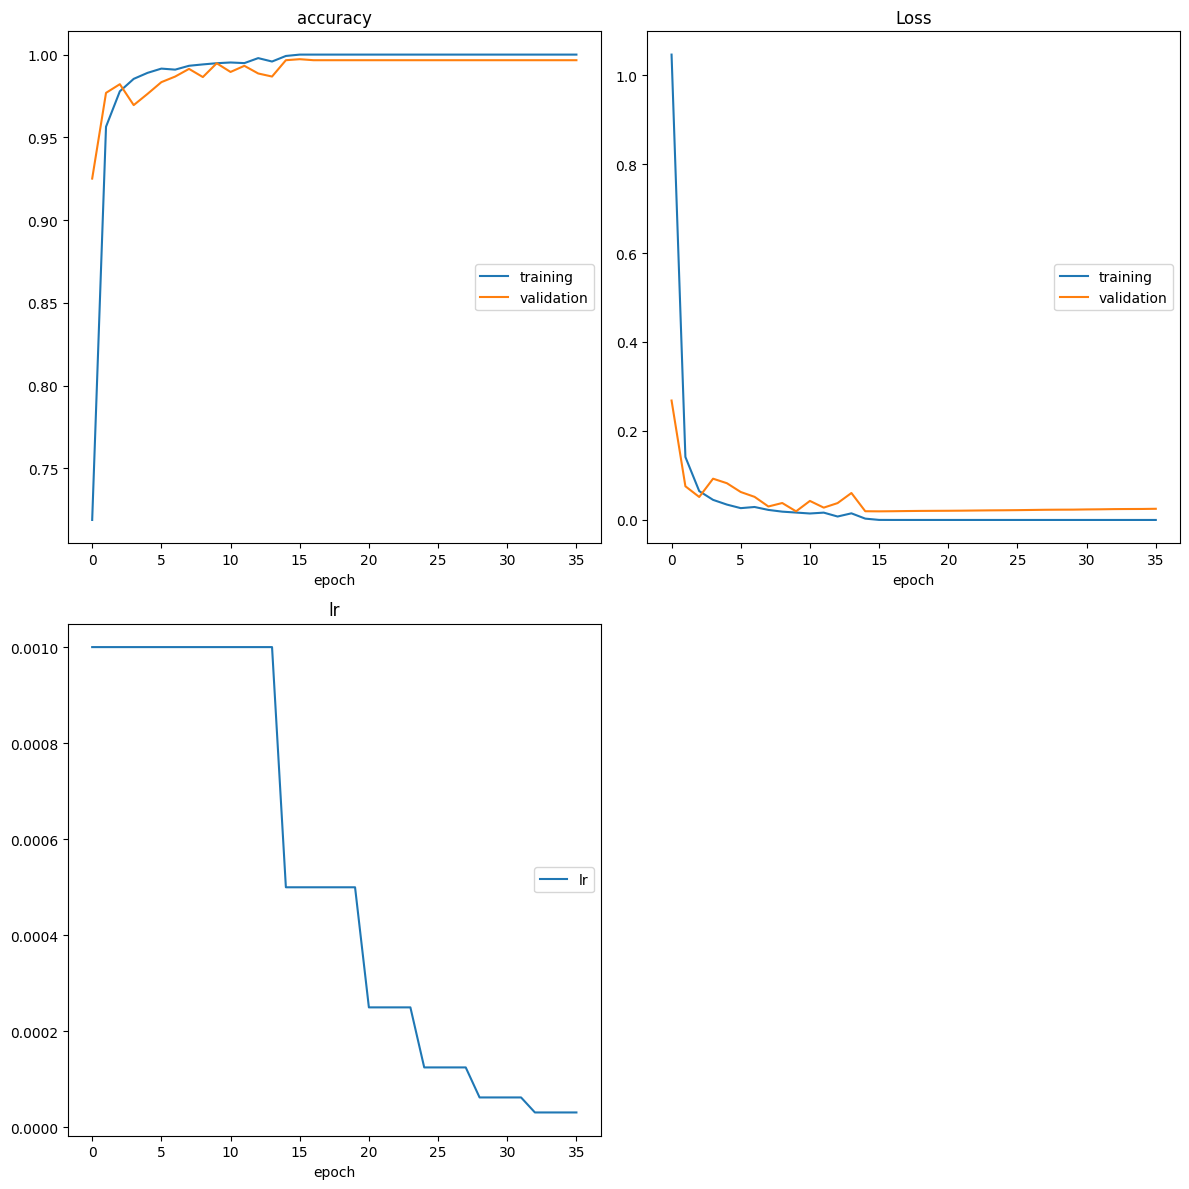

accuracy
	training         	 (min:    0.719, max:    1.000, cur:    1.000)
	validation       	 (min:    0.925, max:    0.997, cur:    0.997)
Loss
	training         	 (min:    0.000, max:    1.046, cur:    0.000)
	validation       	 (min:    0.019, max:    0.268, cur:    0.025)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
913/913 [==============================] - 15s 16ms/step - loss: 4.4493e-08 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9966 - lr: 3.1250e-05
Epoch 36: early stopping
Model fitting completed.
Elapsed time: 0 days, 0 hours, 9 minutes, 24 seconds
113/113 [==============================] - 1s 9ms/step
The accuracy Score -  0.9966703662597114
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.99      1.00      0.99        67
           2       1.00      0.99      0.99        81
           3       1.00      1.00      1.00        57
           4       1.00      

In [7]:
#%%Declaring the CNN Network
 
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(60, activation='softmax')])
 
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
 
main_path =r"C:/Amrita/Semester3/Mini_Project/"
# set callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, verbose=1, mode='max', min_lr=0.00001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(main_path,'CNN_2D_spectro.hdf5'),save_weights_only=True,
                                                       monitor='val_accuracy',
                                                       mode='max',
                                                       save_best_only=True)
 
 
#%% Train the model
print("Model Fiting...")
start_time = dt.now()
model.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_data = (X_val, y_val),callbacks=[early_stop,reduce_lr,model_checkpoint,PlotLossesKeras()])
end_time=dt.now()
elapsed=end_time-start_time
days, seconds = elapsed.days, elapsed.seconds
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60
print("Model fitting completed.")
print("Elapsed time: {} days, {} hours, {} minutes, {} seconds".format(days, hours, minutes, seconds))
 
#%%Model Evaluation
model.load_weights(os.path.join(main_path, 'CNN_2D_spectro.hdf5'))
y_pred = model.predict(X_test).argmax(axis=1)
accuracy=accuracy_score(y_true=y_test2, y_pred=y_pred)
print('The accuracy Score - ',accuracy)
print(classification_report(y_test2,y_pred,target_names=le.classes_))
report = classification_report(y_test2, y_pred, target_names=le.classes_, output_dict=True)
precision = report['weighted avg']['precision']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']
 
print('The accuracy Score -', accuracy)
print('Precision -', precision)
print('Recall -', recall)
print('F1-score -', f1_score)

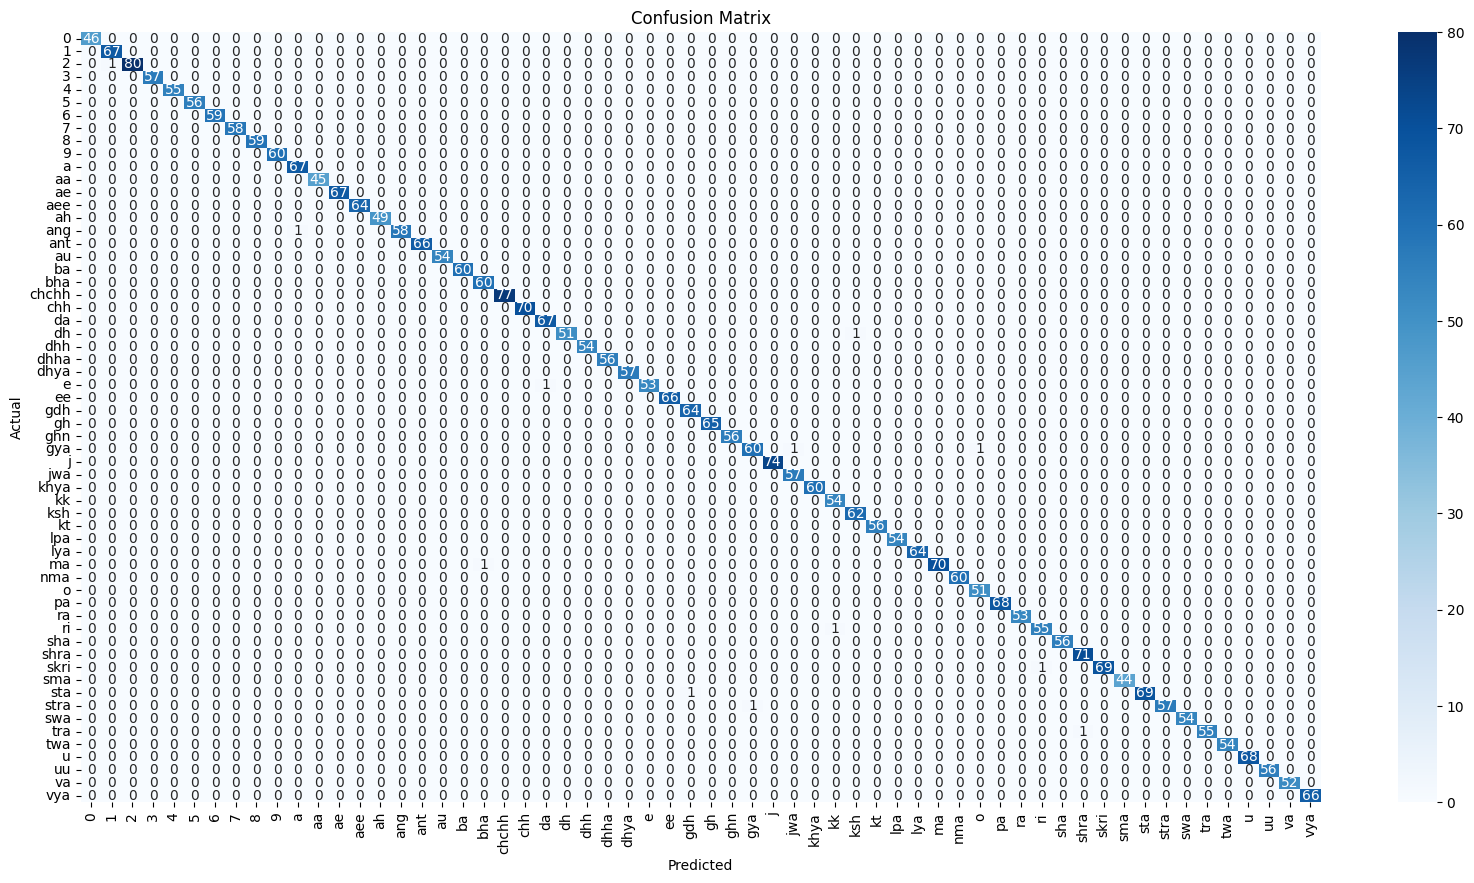

In [8]:
# Plot Confusion Matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test2, y_pred)
plt.figure(figsize=(20, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, classification_report
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(60, activation='softmax')])
 
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
main_path =r"C:/Amrita/Semester3/Mini_Project/"
# set callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, verbose=1, mode='max', min_lr=0.00001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(main_path,'CNN_2DD_spectro.hdf5'),save_weights_only=True,
                                                       monitor='val_accuracy',
                                                       mode='max',
                                                       save_best_only=True)

# Train the model (assuming the model is already defined and compiled)

history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stop, reduce_lr, model_checkpoint])

# Load the best weights based on validation accuracy
model.load_weights(os.path.join(main_path, 'CNN_2DD_spectro.hdf5'))

# Evaluate the model on the test data
y_pred = model.predict(X_test).argmax(axis=1)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Overall Accuracy:', accuracy)

# Calculate class-wise accuracy
classwise_accuracy = {}
for label in range(len(le.classes_)):
    idx = (y_test == label)
    class_accuracy = accuracy_score(y_true=y_test[idx], y_pred=y_pred[idx])
    classwise_accuracy[le.classes_[label]] = class_accuracy

# Print class-wise accuracy
print('\nClass-wise Accuracy:')
for label, acc in classwise_accuracy.items():
    print(f"Class: {label}, Accuracy: {acc:.4f}")

# Generate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 34, 34, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)        

Epoch 35/200
913/913 [==============================] - 12s 13ms/step - loss: 2.3705e-08 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9954 - lr: 3.1250e-05
Epoch 36/200
913/913 [==============================] - 11s 12ms/step - loss: 1.9865e-08 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9957 - lr: 3.1250e-05
Epoch 36: early stopping
113/113 [==============================] - 1s 6ms/step
Overall Accuracy: 0.9966703662597114

Class-wise Accuracy:
Class: 0, Accuracy: 1.0000
Class: 1, Accuracy: 1.0000
Class: 2, Accuracy: 0.9877
Class: 3, Accuracy: 0.9825
Class: 4, Accuracy: 1.0000
Class: 5, Accuracy: 1.0000
Class: 6, Accuracy: 1.0000
Class: 7, Accuracy: 1.0000
Class: 8, Accuracy: 1.0000
Class: 9, Accuracy: 0.9833
Class: a, Accuracy: 1.0000
Class: aa, Accuracy: 1.0000
Class: ae, Accuracy: 1.0000
Class: aee, Accuracy: 0.9844
Class: ah, Accuracy: 1.0000
Class: ang, Accuracy: 1.0000
Class: ant, Accuracy: 1.0000
Class: au, Accuracy: 1.0000
Class: ba, Accuracy: 0.9667
Cla

Epoch 1/200
913/913 [==============================] - 8s 8ms/step - loss: 0.9396 - accuracy: 0.7439 - val_loss: 0.1891 - val_accuracy: 0.9405
Epoch 2/200
913/913 [==============================] - 7s 8ms/step - loss: 0.1064 - accuracy: 0.9661 - val_loss: 0.0737 - val_accuracy: 0.9735
Epoch 3/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0958 - val_accuracy: 0.9664
Epoch 4/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0389 - val_accuracy: 0.9886
Epoch 5/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0308 - accuracy: 0.9894 - val_loss: 0.0902 - val_accuracy: 0.9729
Epoch 6/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0290 - val_accuracy: 0.9923
Epoch 7/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0315 - val_accuracy: 0.9892

Epoch 57/200
913/913 [==============================] - 7s 8ms/step - loss: 1.4703e-10 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 0.9975
Epoch 58/200
913/913 [==============================] - 7s 8ms/step - loss: 5.3094e-11 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9975
Epoch 59/200
913/913 [==============================] - 7s 8ms/step - loss: 3.6758e-11 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9972
Epoch 60/200
913/913 [==============================] - 7s 8ms/step - loss: 4.0842e-11 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9969
Epoch 61/200
913/913 [==============================] - 7s 8ms/step - loss: 2.4505e-11 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9969
Epoch 62/200
913/913 [==============================] - 7s 8ms/step - loss: 2.0421e-11 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 63/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_

913/913 [==============================] - 7s 8ms/step - loss: 1.2253e-11 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9957
Epoch 168/200
913/913 [==============================] - 7s 8ms/step - loss: 3.6758e-11 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9957
Epoch 169/200
913/913 [==============================] - 7s 8ms/step - loss: 8.1684e-12 - accuracy: 1.0000 - val_loss: 0.0331 - val_accuracy: 0.9954
Epoch 170/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0343 - val_accuracy: 0.9954
Epoch 171/200
913/913 [==============================] - 7s 8ms/step - loss: 4.0842e-12 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9954
Epoch 172/200
913/913 [==============================] - 7s 8ms/step - loss: 4.0842e-12 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9954
Epoch 173/200
913/913 [==============================] - 7s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

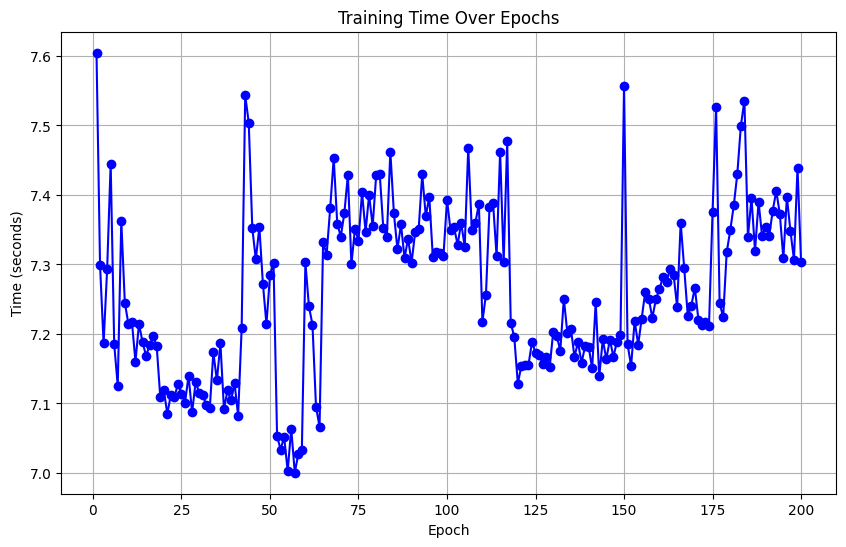

In [23]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

# Custom callback to measure training time
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(60, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create instance of TimeHistory callback
time_callback = TimeHistory()

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_val, y_val), callbacks=[time_callback])

# Plot time complexity
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_callback.times) + 1), time_callback.times, marker='o', linestyle='-', color='b')
plt.title('Training Time Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()
